dataset link =https://www.kaggle.com/eunjurho/german-traffic-sign-recognition-benchmark-cropped

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

 
!pip install keras
from keras.utils import to_categorical
 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import cv2 





In [3]:
from google.colab import files

# Prompt the user to select the folder to upload
uploaded_folder = files.upload()


Saving 00000_00006_00026.png to 00000_00006_00026.png
Saving 00000_00006_00027.png to 00000_00006_00027.png
Saving 00000_00006_00028.png to 00000_00006_00028.png
Saving 00000_00006_00029.png to 00000_00006_00029.png
Saving 00000_00006_00020.png to 00000_00006_00020.png
Saving 00000_00006_00021.png to 00000_00006_00021.png
Saving 00000_00006_00022.png to 00000_00006_00022.png
Saving 00000_00006_00023.png to 00000_00006_00023.png
Saving 00000_00006_00024.png to 00000_00006_00024.png
Saving 00000_00006_00025.png to 00000_00006_00025.png
Saving 00000_00006_00014.png to 00000_00006_00014.png
Saving 00000_00006_00015.png to 00000_00006_00015.png
Saving 00000_00006_00016.png to 00000_00006_00016.png
Saving 00000_00006_00017.png to 00000_00006_00017.png
Saving 00000_00006_00018.png to 00000_00006_00018.png
Saving 00000_00006_00019.png to 00000_00006_00019.png
Saving 00000_00006_00005.png to 00000_00006_00005.png
Saving 00000_00006_00006.png to 00000_00006_00006.png
Saving 00000_00006_00007.png

FileNotFoundError: ignored

In [ ]:

import os
os.chdir('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')


In [ ]:
data = []
labels = []
# We have 44 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
cur_path

'C:\\Users\\satvi\\Downloads\\archive (4)\\gtsrb-preprocessed'

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
#os.mkdir('training')

np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/data.npy',data)
np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/target.npy',labels)

In [ ]:
data=np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/data.npy')
labels=np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/target.npy')

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [ ]:

import sys
print(sys.executable)


C:\Users\satvi\anaconda3\python.exe


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
from keras.utils import to_categorical


In [ ]:
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense


In [ ]:
"""model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))


model.add(Dense(44, activation='softmax'))"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(30,30,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(44, activation='softmax')
])



In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 327s 329ms/step - loss: 1.9878 - accuracy: 0.4356 - val_loss: 1.2143 - val_accuracy: 0.6473
Epoch 2/15
981/981 [==============================] - 282s 287ms/step - loss: 0.6122 - accuracy: 0.8247 - val_loss: 0.3170 - val_accuracy: 0.9005
Epoch 3/15
981/981 [==============================] - 346s 353ms/step - loss: 0.3618 - accuracy: 0.9032 - val_loss: 0.4420 - val_accuracy: 0.9007
Epoch 4/15
981/981 [==============================] - 306s 312ms/step - loss: 0.2874 - accuracy: 0.9265 - val_loss: 0.2614 - val_accuracy: 0.9415
Epoch 5/15
981/981 [==============================] - 305s 311ms/step - loss: 0.2528 - accuracy: 0.9379 - val_loss: 0.4110 - val_accuracy: 0.8971
Epoch 6/15
981/981 [==============================] - 364s 371ms/step - loss: 0.2222 - accuracy: 0.9465 - val_loss: 0.1662 - val_accuracy: 0.9635
Epoch 7/15
981/981 [==============================] - 308s 314ms/step - loss: 0.1529 - accuracy: 0.9618 - val_loss: 0.2456 -

In [ ]:
# save the weights to an HDF5 file
model.save_weights('model_weights.h5')

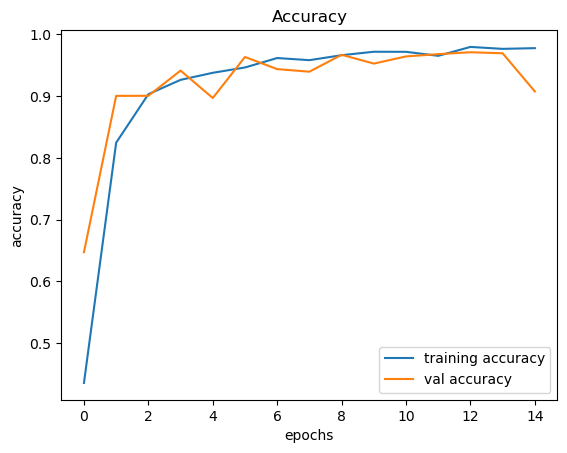

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

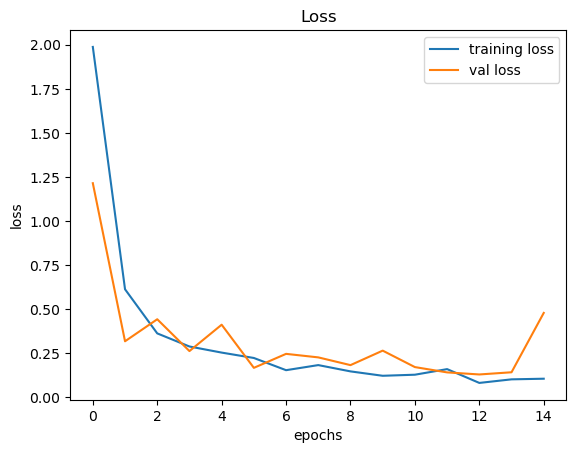

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons',
            43: 'No sign'}

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pyttsx3
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

1/1 [==============================] - 0s 44ms/step
Predicted traffic sign is:  Speed limit (100km/h)


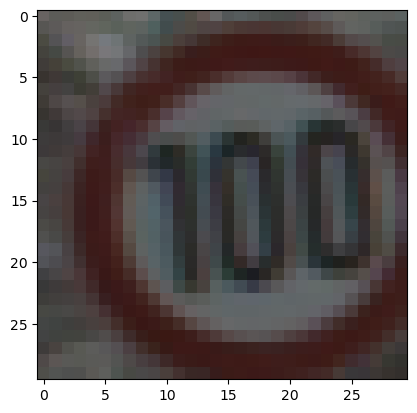

In [ ]:
plot,prediction = test_on_img('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed/train/7/00007_00047_00027.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()
engine = pyttsx3.init()
engine.say(classes[a])
engine.runAndWait()